In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
ds = pd.read_csv('glass.csv')

In [24]:
y = ds['Type']
m = len(y)
m_train = int(m * 0.8)
m_test = len(y) - m_train
X = ds.drop('Type', axis=1)
m_train, m_test

(171, 43)

In [25]:
X.insert(0, "", [1 for _ in range(len(y))])

In [26]:
X_train = X.iloc[:m_train,:]
X_test = X.iloc[m_train:,:]
y_train = y.iloc[:m_train]
y_test = y.iloc[m_train:]

In [27]:
def cost_function(X, y, theta, l):
    h = 1/(1 + np.exp(-X.dot(theta)))
    y = np.array(y)
    summ = y.dot(np.log(h)) + (1-y).dot(np.log(1-h))
    return -summ/m

In [28]:
def gradient_descent(X, y, theta):
    iterations = 10000
    j_history = np.array([0 for _ in range(iterations)], dtype=np.float32)
    alpha = 0.001
    l = 0.7
    for i in range(iterations):  
        h = 1/(1 + np.exp(-X.dot(theta)))
        grad = ((alpha/m) * X.T.dot(h-y)) + (alpha*l*theta/m)
        grad_no_regularization = (alpha/m) * X.T.dot(h-y)
        grad[0] = grad_no_regularization[0]
        theta = theta - grad
        j_history[i] = cost_function(X, y, theta, l)
#     print(j_history)
    plt.plot(np.arange(0, iterations), j_history)
    plt.ylabel('J (cost function)')
    plt.xlabel('Iterations')
    plt.show()
    return theta

In [29]:
k = 7
theta = np.zeros([k, 10], dtype=np.float32)

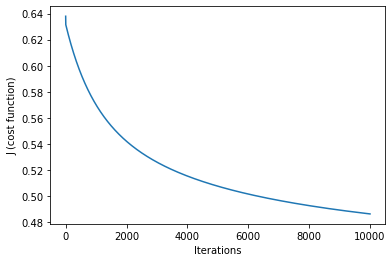

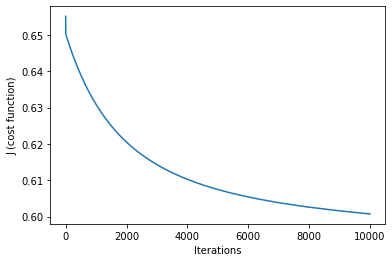

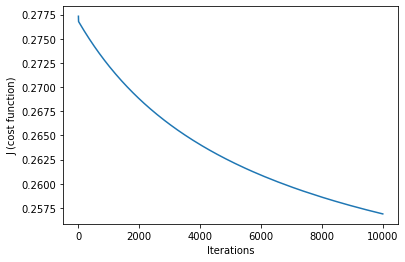

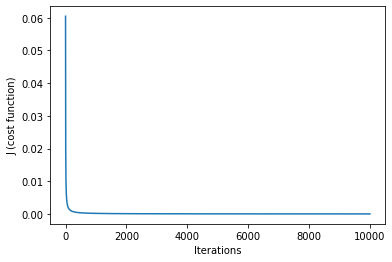

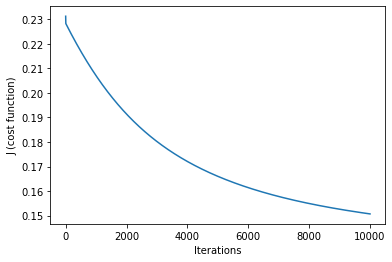

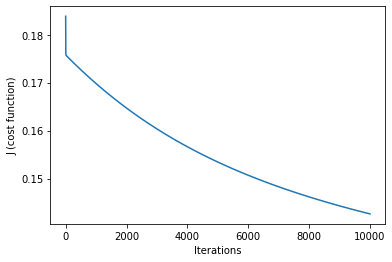

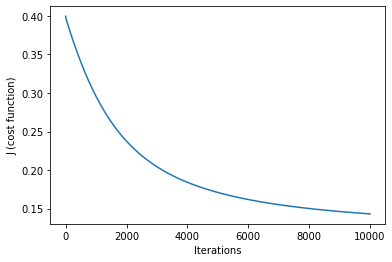

In [30]:
for j in range(k):
    new_y = np.array([int(y[i] == (j+1)) for i in range(m)])
    theta[j] = gradient_descent(X, new_y, theta[j])

In [31]:
theta

array([[-7.90230231e-04,  4.93272091e-06, -1.81533784e-01,
         8.59075606e-01, -4.82699484e-01, -1.43655408e-02,
        -1.16419137e-01,  9.59507227e-02, -1.49890214e-01,
        -1.38183208e-02],
       [ 2.27704621e-03,  3.56129301e-03, -4.23344404e-01,
         3.01079392e-01,  1.00360274e-01,  3.32690328e-02,
         5.71424849e-02,  1.81287289e-01, -1.74899638e-01,
         5.98591939e-02],
       [ 1.32599182e-03,  1.69526041e-03,  6.64654449e-02,
         3.80158573e-01, -1.30059823e-01, -5.76186627e-02,
        -6.23833425e-02, -8.63889325e-03, -7.90751353e-02,
        -1.21414929e-03],
       [-1.99812138e-03, -2.94583640e-03, -2.60093939e-02,
        -5.24098566e-03, -2.80680670e-03, -1.40872374e-01,
        -9.86758154e-04, -1.73878055e-02, -3.45726556e-04,
        -1.11653411e-04],
       [ 1.14297832e-03,  1.42565614e-03, -2.28971750e-01,
        -5.19231141e-01,  2.60489643e-01, -1.76670831e-02,
         4.36402261e-01,  2.10362718e-01, -4.97082025e-02,
        -1.

In [32]:
for j in range(k):
    y = np.array(y)
    new_y = np.array([int(y[i] == (j+1)) for i in range(m)])
    p = [1/(1 + np.exp(-X.dot(theta[j]))) >= 0.5]
    print(np.mean(p==new_y)*100)

71.02803738317756
65.42056074766354
92.05607476635514
100.0
94.85981308411215
95.7943925233645
96.26168224299066
